<a href="https://colab.research.google.com/github/zi-onion/ESAA/blob/main/05_31_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽가이드 ch7. 5 pg. 441~451

---



##05. DBSCAN

###DBSCAN 개요

간단하고 직관적인 알고리즘임에도 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능함

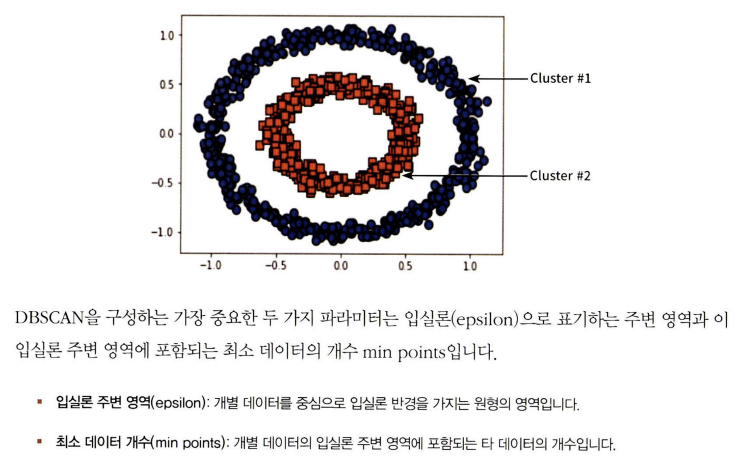

데이터 포인트 정의

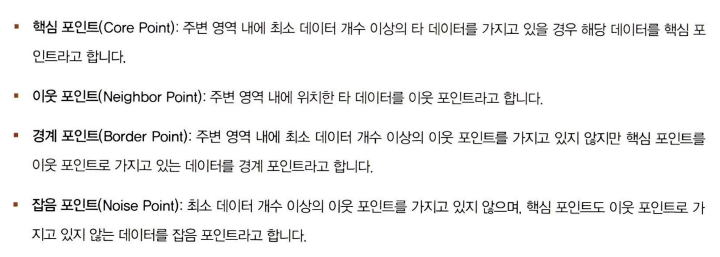

1. P1부터 P12까지 12개의 데이터 세트에 대해 DBSCAN 군집화 적용. 특정 입실론 반경 내에 포함될 최소 데이터 세트를 6개로 가정함

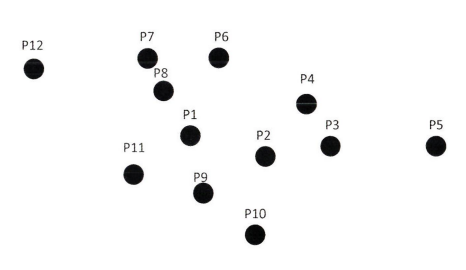

2. P1 데이터를 기준으로 입실론 반경 내에 포함된 데이터가 7개로 최소 데이터 5개 이상을 만족하므로 p1 데이터는 핵심 포인트가 됨

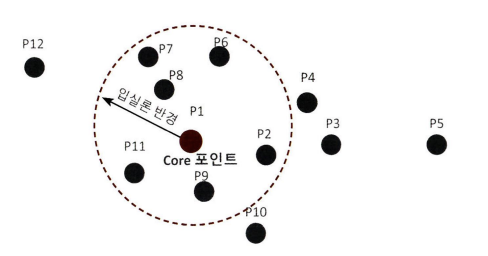

3. P2 역시 반경 내에 6개의 데이터를 가지고 있으므로 핵심 포인트임

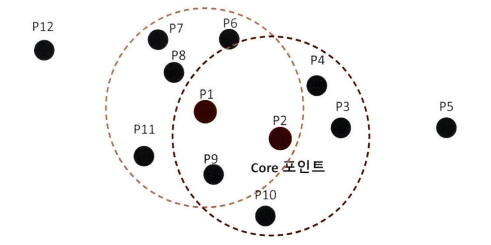

4. 핵심 포인트 P1의 이웃 데이터 포인트 P2 역시 핵심 포인트일 경우 P1에서 P2로 연결해 직접 접근이 가능함

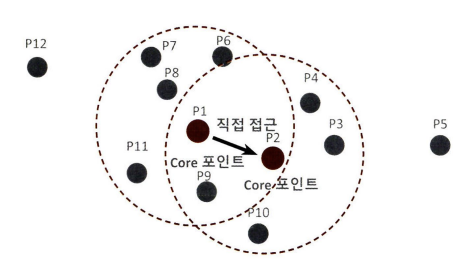

5. 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화를 구성함. 이러한 방식으로 점차적으로 군집 영역을 확장해 나가는것이 DBSCAN 군집화 방식임

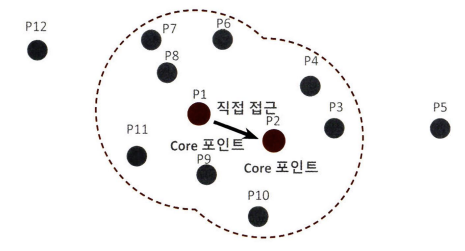

6. P3 데이터의 경우 반경 내에 포함되는 이웃 데이터는 P2,P4로 2개이므로 군집으로 구분할 수 있는 핵심 포인트가 될 수 없음. 하지만 이웃 데이터 중에 핵심 포인트 P2를 가지고 있음. 이처럼 자신은 핵심 포인트가 아니지만, 이웃 데이터로 핵심 포인트를 가지고 있는 데이터를 경계 포인트라고 함. 경계 포인트는 군집의 외곽을 형성함

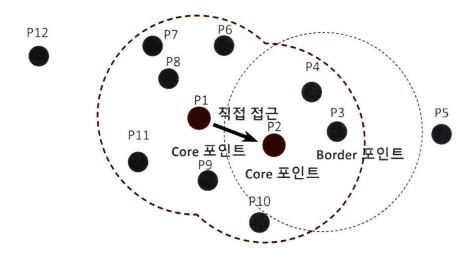

7. p5와 같이 반경 내에 최소 데이터를 가지고 있지도 않고, 핵심 포인트 또한 이웃 데이터로 가지고 있지 않는 데이터를 잡은 포인트라고 함

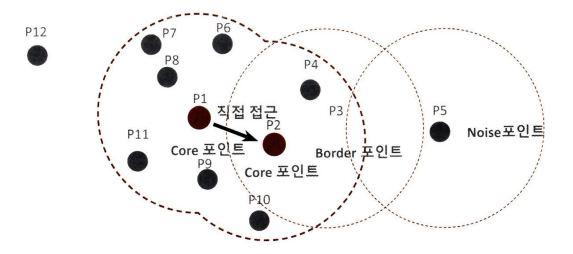

DBSCAN은 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화를 구성하는 방식

[DBSCAN 클래스의 주요 초기화 파라미터]

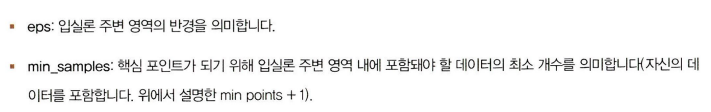

###DBSCAN 적용하기 - 붓꽃 데이터 세트

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [ ]:
# DBSCAN 클래스 이용해 붓꽃 데이터 세트 군집화
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


0과 1 외에 특이하게 -1 군집 레이블이 있음. 군집 레이블이 -1인 것은 노이즈에 속하는 군집을 의미함. 따라서 위 붓꽃 데이터 세트는 DBSCAN에서 0과 1 두 개의 군집으로 군집화됨

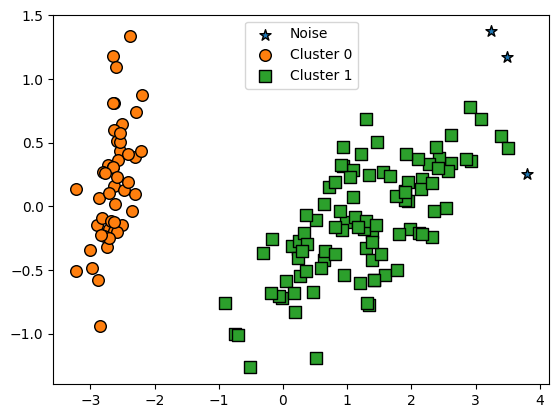

In [ ]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

별로 표현된 값은 모두 노이즈임.

PCA 1차원으로 표현하면 이상치인 노이즈 데이터가 명확히 드러남

eps가 커지면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 데이터 개수가 작아짐

min_samples를 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커지게 됨

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


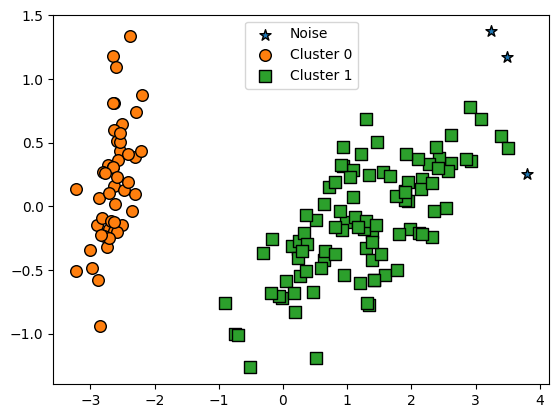

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

노이즈 군집인 -1이 3개밖에 없음

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


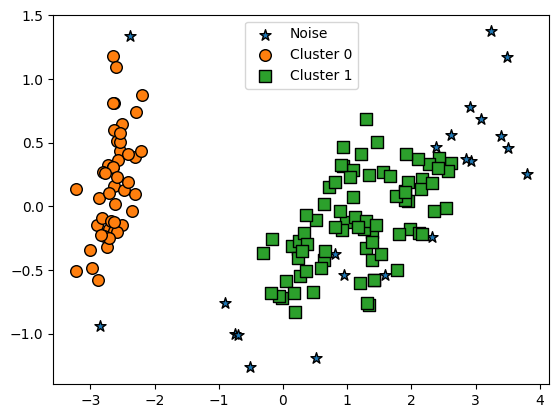

In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

###DBSCAN 적용하기 - make_circles() 데이터 세트

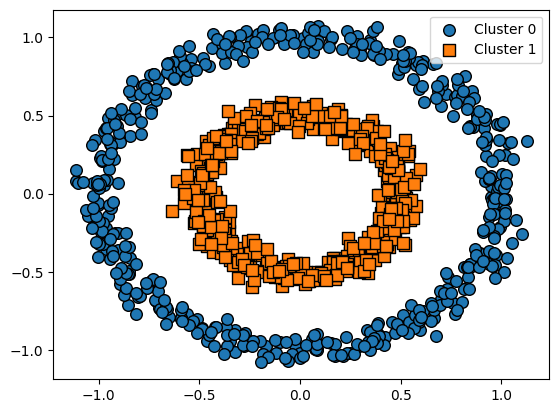

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

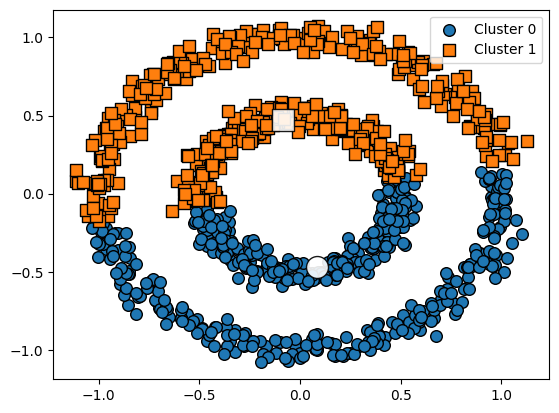

In [ ]:
# KMeans로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

위, 아래 군집 중심을 기반으로 위와 아래 절반으로 군집화됨

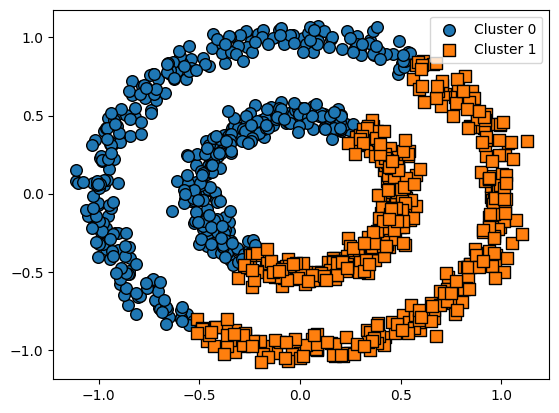

In [ ]:
# GMM으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

앞 절의 일렬로 늘어선 데이터 세트에서는 효과적으로 군집화 적용이 가능했으나, 내부와 외부의 원형으로 구성된 더 복잡한 형태의 데이터 세트에서는 군집화가 원하는 방향으로 되지 않음

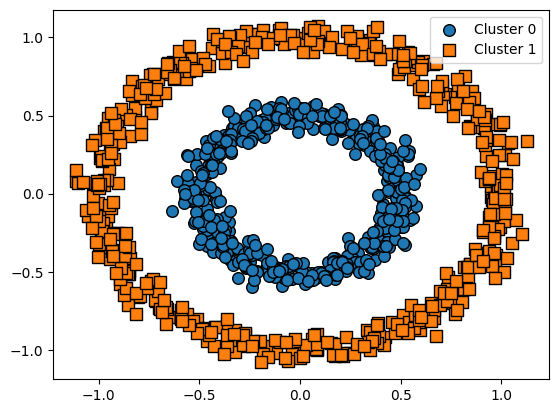

In [ ]:
# DBSCAN으로 make_circles() 데이터 세트 군집화 수행
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

원하는 방향으로 정확히 군집화가 됨